In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))

import qiskit
provider = qiskit.IBMQ.load_account()


import numpy as np

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA
from shared.QiskitMaxcut import *
from ibm.ibm_parameters import *
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
quantum_instance = QuantumInstance(
                    backend=Aer.get_backend(DEFAULT_QASM_SIMULATOR),
                    shots=SHOTS)


In [ ]:
graph = load_graph()
max_cut = Maxcut(graph)
max_cut_qubo = max_cut.to_qubo()
max_cut.draw()

In [ ]:
step_size = 0.1
a_gamma = np.arange(0, np.pi, step_size)
b_beta = np.arange(0, np.pi, step_size)


In [ ]:
a_gamma, b_beta = np.meshgrid(a_gamma, b_beta)

In [ ]:
def run_qaoa(gamma, beta):
    qaoa = QAOA(optimizer=COBYLA(maxiter=0),
                quantum_instance=quantum_instance,
                reps=1,
                initial_point=[gamma, beta])
    algorithm = MinimumEigenOptimizer(qaoa)
    result = algorithm.solve(max_cut_qubo)
    optimal_parameters = qaoa.optimal_params
    mean, distribution = max_cut.analyse(result)

    return mean

In [19]:
F1 = np.zeros(a_gamma.shape)
for i in range(0, len(F1)):
    for j in range(0, len(F1)):
        # F1[i,j] = a_gamma[i][j] * b_beta[i][j]
        F1[i,j] = run_qaoa(a_gamma[i][j], b_beta[i][j])

[[-23.989125 -23.832125 -23.953375 ... -24.063625 -24.0405   -23.960875]
 [-23.9965   -19.6505   -15.329    ... -30.67475  -28.898875 -25.700125]
 [-24.059625 -24.07125  -23.488375 ... -21.5505   -22.69975  -23.737375]
 ...
 [-23.865375 -24.618    -25.63425  ... -25.144875 -24.2125   -23.867875]
 [-23.91275  -24.726375 -25.7405   ... -24.662625 -23.816875 -23.954375]
 [-24.078375 -24.89175  -25.463375 ... -22.69625  -23.117625 -23.68625 ]]


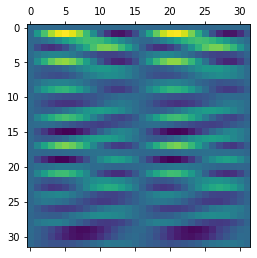

In [20]:
print(F1)
plt.matshow(F1)
plt.show()

In [14]:
np.mean(F1)

-23.66644104003906

In [22]:
F2 = F1 - np.mean(F1)

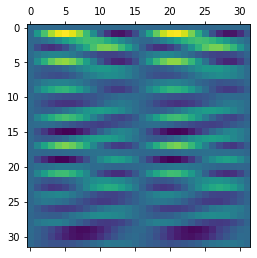

In [23]:
plt.matshow(F2)
plt.show()

In [24]:
F2

array([[-0.40801367, -0.25101367, -0.37226367, ..., -0.48251367,
        -0.45938867, -0.37976367],
       [-0.41538867,  3.93061133,  8.25211133, ..., -7.09363867,
        -5.31776367, -2.11901367],
       [-0.47851367, -0.49013867,  0.09273633, ...,  2.03061133,
         0.88136133, -0.15626367],
       ...,
       [-0.28426367, -1.03688867, -2.05313867, ..., -1.56376367,
        -0.63138867, -0.28676367],
       [-0.33163867, -1.14526367, -2.15938867, ..., -1.08151367,
        -0.23576367, -0.37326367],
       [-0.49726367, -1.31063867, -1.88226367, ...,  0.88486133,
         0.46348633, -0.10513867]])

In [31]:
np.unravel_index(np.argmin(F1), F1.shape)

(15, 5)

In [25]:
np.max(F1)

-8.592625